# Fellowship.Ai - Aditya Goel

#### AG news classification

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df= pd.read_csv("ag_news_csv/train.csv")
df = df[pd.notnull(df['tags'])]
df.head()

,tags,post,detail
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


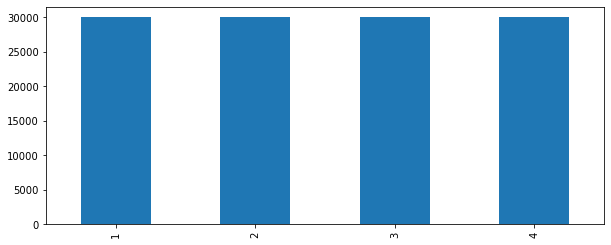

In [8]:
my_tags= [1,2,3,4]
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [9]:
mylist = df.values.tolist()
new_list=[]
for i in mylist:
    new_list.append([i[0],i[1]+" "+ i[2]])

df= pd.DataFrame(new_list, columns=["tags","post"])
df.head()

,tags,post
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df['post'] = df['post'].apply(clean_text)

In [12]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


### Using Naive Bayes Classifier

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9063611111111111
              precision    recall  f1-score   support

           1       0.91      0.90      0.90      8932
           2       0.95      0.98      0.97      9096
           3       0.87      0.88      0.87      8943
           4       0.89      0.87      0.88      9029

    accuracy                           0.91     36000
   macro avg       0.91      0.91      0.91     36000
weighted avg       0.91      0.91      0.91     36000



### Using Linear SVM

In [14]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.88625
              precision    recall  f1-score   support

           1       0.90      0.88      0.89      8932
           2       0.89      0.99      0.94      9096
           3       0.86      0.84      0.85      8943
           4       0.88      0.83      0.86      9029

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000



##### As we can clearly see here that Naive Bayes outperforms other classifiers, I hahve even tried it with logistic regression and others and the results are inferior to Naive Bayes

In [16]:
#adding test set
"""
df= pd.read_csv("test.csv")
df = df[pd.notnull(df['tags'])]

my_tags= [1,2,3,4]
#plt.figure(figsize=(10,4))
#df.tags.value_counts().plot(kind='bar');

mylist = df.values.tolist()
new_list=[]
for i in mylist:
    new_list.append([i[0],i[1]+" "+ i[2]])

df= pd.DataFrame(new_list, columns=["tags","post"])

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)
#print_plot(10)

X = df.post
Y = df.tags
y_pred = nb.predict(X)

print('accuracy %s' % accuracy_score(y_pred, Y))
print(classification_report(Y, y_pred))
"""

'\ndf= pd.read_csv("test.csv")\ndf = df[pd.notnull(df[\'tags\'])]\n\nmy_tags= [1,2,3,4]\n#plt.figure(figsize=(10,4))\n#df.tags.value_counts().plot(kind=\'bar\');\n\nmylist = df.values.tolist()\nnew_list=[]\nfor i in mylist:\n    new_list.append([i[0],i[1]+" "+ i[2]])\n\ndf= pd.DataFrame(new_list, columns=["tags","post"])\n\nREPLACE_BY_SPACE_RE = re.compile(\'[/(){}\\[\\]\\|@,;]\')\nBAD_SYMBOLS_RE = re.compile(\'[^0-9a-z #+_]\')\nSTOPWORDS = set(stopwords.words(\'english\'))\n\ndef clean_text(text):\n    text = BeautifulSoup(text, "lxml").text # HTML decoding\n    text = text.lower() # lowercase text\n    text = REPLACE_BY_SPACE_RE.sub(\' \', text) # replace REPLACE_BY_SPACE_RE symbols by space in text\n    text = BAD_SYMBOLS_RE.sub(\'\', text) # delete symbols which are in BAD_SYMBOLS_RE from text\n    text = \' \'.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text\n    return text\n    \ndf[\'post\'] = df[\'post\'].apply(clean_text)\n#print_plot(1

### Classifying using Doc2Vec Model

In [18]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
!pip install gensim
from gensim.models import doc2vec
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [19]:
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test


model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    

def get_vectors(model, corpus_size, vectors_size, vectors_type):

    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

100%|█████████████████████████████████████████████████████████████████████| 120000/120000 [00:00<00:00, 3872558.90it/s]
<ipython-input-19-d124b065c955>:27: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors[i] = model.docvecs[prefix]


#### Using these generated vectors with logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

C:\Users\adity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.8549722222222222
              precision    recall  f1-score   support

           1       0.86      0.85      0.85      8964
           2       0.92      0.94      0.93      8993
           3       0.82      0.82      0.82      8974
           4       0.82      0.82      0.82      9069

    accuracy                           0.85     36000
   macro avg       0.85      0.86      0.85     36000
weighted avg       0.85      0.85      0.85     36000



C:\Users\adity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Thankyou for your time

Hope to hear a positive response from you soon 